###  Valuation Model – Explained

- **Valuation** is how much a company is believed to be worth by investors.
- **P/S Ratio** = Valuation ÷ Revenue  
   It’s used for fast-growth, unprofitable startups.

####  What We See:
- BYJU’S actual valuation (red line) reached $22B in 2022, but even under an aggressive 10x multiple, the fair value was only ~$6B.
- Under normal 3–6x ranges, the fair value was $2B–4B.
- In 2023, valuation collapsed to $225M, reflecting real fundamentals.

####  Conclusion:
- BYJU’S was overvalued by 4x–10x at its peak.  
- This signals a classic funding bubble fueled by hype, not profit.


# Loading the financials dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import seaborn as sns

df = pd.read_csv(os.path.join('..', 'data', 'financials.csv'))

In [2]:
INR_to_USD = 0.0125
df['Revenue_USD'] = df['Revenue_INR'] * INR_to_USD * 1e7  
df.head()

,Year,Revenue_INR,EBITDA_INR,Net_Loss_INR,Employee_Costs_INR,Marketing_INR,Cash_on_Hand_INR,Revenue_USD
0,2017,250,10,-50,12,18,400,31250000.0
1,2018,520,25,-30,30,40,600,65000000.0
2,2019,1400,60,-83,60,70,1000,175000000.0
3,2020,2500,-100,-260,80,100,1500,312500000.0
4,2021,2400,-1000,-2300,500,1000,1300,300000000.0


In [3]:
df['Fair_Valuation_3x'] = df['Revenue_USD'] * 3
df['Fair_Valuation_6x'] = df['Revenue_USD'] * 6
df['Fair_Valuation_10x'] = df['Revenue_USD'] * 10
df.head()

,Year,Revenue_INR,EBITDA_INR,Net_Loss_INR,Employee_Costs_INR,Marketing_INR,Cash_on_Hand_INR,Revenue_USD,Fair_Valuation_3x,Fair_Valuation_6x,Fair_Valuation_10x
0,2017,250,10,-50,12,18,400,31250000.0,93750000.0,1.875000e+08,3.125000e+08
1,2018,520,25,-30,30,40,600,65000000.0,195000000.0,3.900000e+08,6.500000e+08
2,2019,1400,60,-83,60,70,1000,175000000.0,525000000.0,1.050000e+09,1.750000e+09
3,2020,2500,-100,-260,80,100,1500,312500000.0,937500000.0,1.875000e+09,3.125000e+09
4,2021,2400,-1000,-2300,500,1000,1300,300000000.0,900000000.0,1.800000e+09,3.000000e+09


In [4]:
valuation_actual = {
    '2018': 1e9,
    '2019': 3.5e9,
    '2020': 8e9,
    '2021': 16.5e9,
    '2022': 22e9,
    '2023': 0.225e9
}

df['Actual_Valuation'] = df['Year'].astype(str).map(valuation_actual)
df.head()

,Year,Revenue_INR,EBITDA_INR,Net_Loss_INR,Employee_Costs_INR,Marketing_INR,Cash_on_Hand_INR,Revenue_USD,Fair_Valuation_3x,Fair_Valuation_6x,Fair_Valuation_10x,Actual_Valuation
0,2017,250,10,-50,12,18,400,31250000.0,93750000.0,1.875000e+08,3.125000e+08,NaN
1,2018,520,25,-30,30,40,600,65000000.0,195000000.0,3.900000e+08,6.500000e+08,1.000000e+09
2,2019,1400,60,-83,60,70,1000,175000000.0,525000000.0,1.050000e+09,1.750000e+09,3.500000e+09
3,2020,2500,-100,-260,80,100,1500,312500000.0,937500000.0,1.875000e+09,3.125000e+09,8.000000e+09
4,2021,2400,-1000,-2300,500,1000,1300,300000000.0,900000000.0,1.800000e+09,3.000000e+09,1.650000e+10


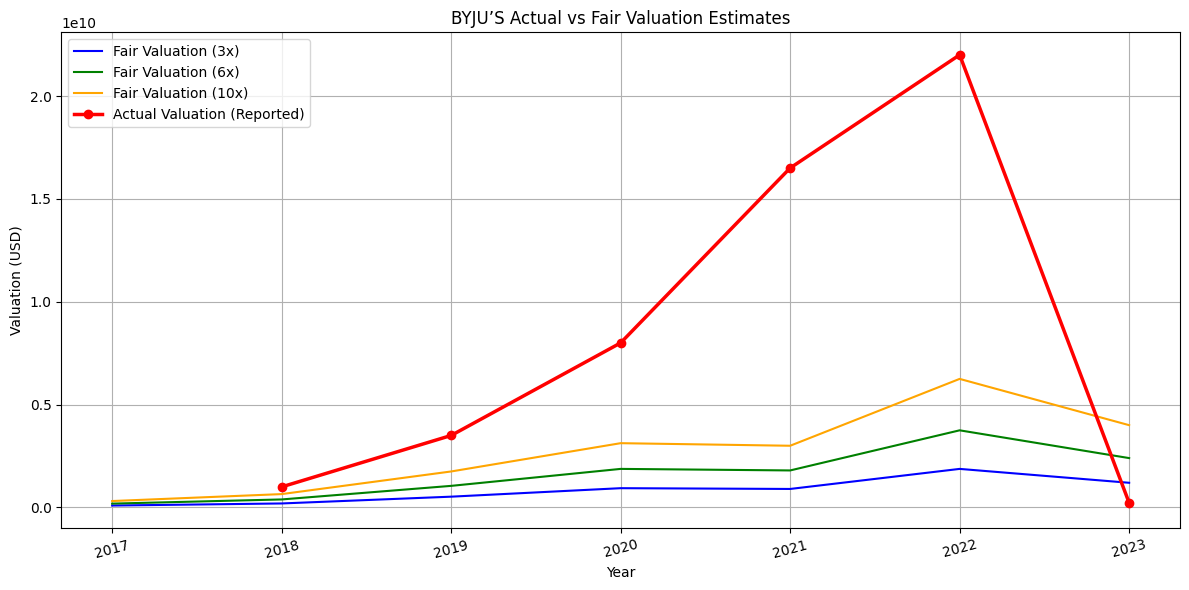

In [5]:
plt.figure(figsize=(12, 6))

# Plot all valuations
plt.plot(df['Year'], df['Fair_Valuation_3x'], label='Fair Valuation (3x)', color='blue')
plt.plot(df['Year'], df['Fair_Valuation_6x'], label='Fair Valuation (6x)', color='green')
plt.plot(df['Year'], df['Fair_Valuation_10x'], label='Fair Valuation (10x)', color='orange')
plt.plot(df['Year'], df['Actual_Valuation'], label='Actual Valuation (Reported)', linewidth=2.5, color='red', marker='o')

plt.title("BYJU’S Actual vs Fair Valuation Estimates")
plt.ylabel("Valuation (USD)")
plt.xlabel("Year")
plt.xticks(rotation=15)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
